In [1]:
import numpy as np

In [7]:
from sklearn.datasets import make_regression

In [8]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ------- ------------------------------- 30.7/162.8 kB 1.3 MB/s eta 0:00:01
     ---------------------- ---------------- 92.2/162.8 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.4 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
    --------------------------------------- 0.1/7.7 MB 4.3 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.7 MB 3.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.7 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.7 MB 3.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/7.7 MB 3.0 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.7 MB 3.0 MB/s eta 0:00:03
   ---- ------------------------

In [10]:
import matplotlib.pyplot as plt

In [10]:
make_regression

<function sklearn.datasets._samples_generator.make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)>

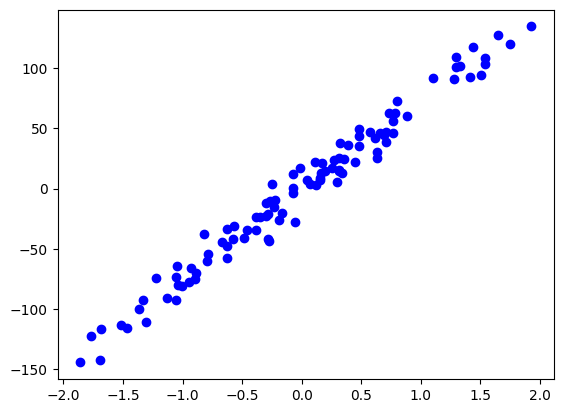

In [14]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x,y, color='b')

In [15]:
x.shape

(100, 1)

In [16]:
y.shape

(100,)

In [17]:
y = y.reshape(y.shape[0], 1)

In [18]:
y.shape

(100, 1)

In [19]:
# Add, the biais column : concate two columns
X = np.hstack((x, np.ones(x.shape)))

In [20]:
# 1.X
X

array([[-0.9430113 ,  1.        ],
       [-1.69371992,  1.        ],
       [ 0.15654685,  1.        ],
       [ 0.31571556,  1.        ],
       [-1.68537225,  1.        ],
       [-0.34993104,  1.        ],
       [ 1.53807398,  1.        ],
       [ 0.79676866,  1.        ],
       [-0.66944182,  1.        ],
       [-0.21995067,  1.        ],
       [-1.76402172,  1.        ],
       [ 0.313683  ,  1.        ],
       [ 0.65732407,  1.        ],
       [ 0.70479844,  1.        ],
       [ 0.11965432,  1.        ],
       [ 0.15654691,  1.        ],
       [-0.27001064,  1.        ],
       [ 0.48078127,  1.        ],
       [-0.92625877,  1.        ],
       [-1.22180599,  1.        ],
       [-1.33086574,  1.        ],
       [-0.79809592,  1.        ],
       [ 1.43321294,  1.        ],
       [-0.62702805,  1.        ],
       [-1.05630179,  1.        ],
       [ 1.74454654,  1.        ],
       [ 1.54075967,  1.        ],
       [ 0.29351204,  1.        ],
       [ 0.56888027,

In [21]:
# 2. Theat = [a, b]
theta = np.random.randn(2,1)
theta

array([[ 0.59928626],
       [-0.82831821]])

In [22]:
# Model 
#F = X.theta

In [23]:
def model(X, theta):
    return X.dot(theta)

In [24]:
lm = model(X, theta)

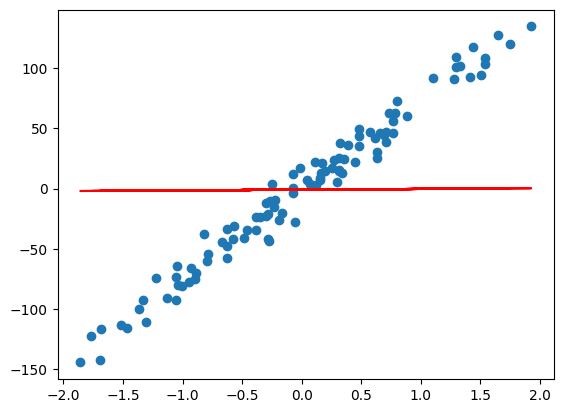

In [25]:
plt.scatter(x,y)
plt.plot(x, lm, c ='r')

In [69]:
# 3 : Cost function (MSE)

def cost_function(X, theta, y):
    return (1/2*len(y))*np.sum((y-lm)**2)


In [70]:
cost_function(X, theta, y)

6908573.660423884

In [78]:
# 4 : Gradient -> Gradient Descent
## 4.1 : Gradient
def gradient(X, theta, y):
    XT = X.T
    return (1/len(y))*XT.dot((lm-y))

In [79]:
gradient(X, theta, y)

array([[-33.04858848],
       [  1.57503555]])

In [136]:
# 4.2 : Graddient Descent :
def gradient_descent(X, theta, y, learnig_rate, n_iter):
    cost = np.zeros(n_iter)
    for i in range(n_iter):
        theta = theta - learnig_rate*gradient(X,theta, y)
        cost[i] = cost_function(X, theta, y)
                
    return theta, cost

In [137]:
theta_finale, cost = gradient_descent(X, theta, y, learnig_rate=0.0001, n_iter=10000)
theta_finale

array([[33.95740246],
       [-1.68314664]])

In [138]:
predictions = model(X, theta_finale)

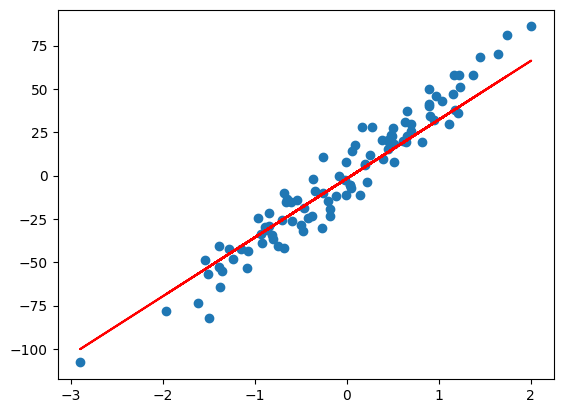

In [139]:
plt.scatter(x,y)
plt.plot(x, predictions, c ='r')

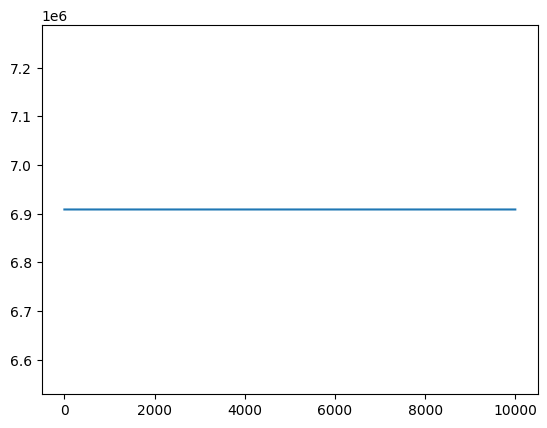

In [140]:
# courbe d'apprentissage
plt.plot(range(10000), cost)

In [157]:
# coefficient de détermination 
# R^2

def r_squared(predictions, y):
    return 1-((predictions-y)**2).sum()/((y-y.mean())**2).sum()

In [158]:
print("Le coefficient de détermination est {:.2f} %".format(r_squared(predictions, y) * 100))

Le coefficient de détermination est 91.49 %
